# Plot a generational histogram displaying the cell cycle duration:

For previous work on this topic, have a look at our recent lab publication at [Bove et al., 2017](https://www.molbiolcell.org/doi/full/10.1091/mbc.E17-06-0368?url_ver=Z39.88-2003&rfr_id=ori:rid:crossref.org&rfr_dat=cr_pub%3dpubmed "Local cellular neighborhood controls proliferation in cell competition")

When processing the data, do the following:
+ Include all movies (MDCK WT 100% as well as uninduced competition with MDCK WT 90%)
+ Exclude generations #7 and higher: only include generations #1, #2, #3, #4, #5, #6 in the histogram
+ Range the histogram from 7 to 42 hours (those including!)
+ Plot the data with 35 bins (or 70 if detail preferred)
+ With the abovementioned range, you get the histogram of _over 20,000 cells!_ **Cool!!!**


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import h5py

from tqdm import tqdm
from Server_Movies_Paths import Get_MDCK_Movies_Paths_Temporary


### Process the movies & extract cell cycle duration information:

In [2]:
movies = Get_MDCK_Movies_Paths_Temporary()
cct = [[] for _ in range(10)]
total_fake_cells, total_true_cells = 0, 0

for movie in tqdm(movies):
    
    hdf5_file = movie + "HDF/segmented.hdf5"
    pos, date = movie.split("/")[-2], movie.split("/")[-3]
    #print (f"{date}, {pos}", end="\t")
        
    with h5py.File(hdf5_file, 'r') as f:
        total_fake_cells += len(f["tracks"]["obj_type_1"]["map"])
        
        for cell in f["tracks"]["obj_type_1"]["Ch_Ch_Gen_CCT"]:
            gen = int(cell[2])
            if gen == 0:
                continue
            
            # Check if cell has children:
            if int(cell[0]) != 0 and int(cell[1]) != 0:
                cct[gen-1].append(float(cell[3]))
                total_true_cells += 1
                

100%|██████████| 44/44 [00:29<00:00,  1.50it/s]


### Print out some statistics of the cell cycle times of all tracked objects (even fakes): 

In [3]:
lng, mean, std, mn, mx = [[0 for _ in range(10)] for _ in range(5)]

for enum, gen in enumerate(cct):
    lng[enum] = len(gen)
    if len(gen) > 1:
        mean[enum] = round(np.mean(gen), 4)
        std[enum] = round(np.std(gen), 4)
        mn[enum] = round(np.min(gen), 4)
        mx[enum] = round(np.max(gen), 4)
    elif len(gen) == 1:
        mean[enum] = round(gen[0], 4)
        std[enum] = 0.0
        mn[enum] = round(gen[0], 4)
        mx[enum] = round(gen[0], 4)
    else:
        mean[enum] = 0.0
        std[enum] = 0.0
        mn[enum] = 0.0
        mx[enum] = 0.0
    

### Print out some generational stats:

In [4]:
print (f"Total Tracked Objects: {total_fake_cells}")
print (f"Total Non-root Non-leaf Cells: {total_true_cells}\n")

for e, (l, m, s, n, x) in enumerate(zip(lng, mean, std, mn, mx)):
    print ("Cells in Gen#{}\t-> {}\tMean = {}\tSt.dev = {}\tMin = {}\tMax = {}".format(e+1, l, m, s, n, x))

Total Tracked Objects: 249659
Total Non-root Non-leaf Cells: 22519

Cells in Gen#1	-> 9375	Mean = 16.2991	St.dev = 7.4993	Min = 0.0667	Max = 73.3333
Cells in Gen#2	-> 7723	Mean = 17.2079	St.dev = 6.5559	Min = 0.0667	Max = 76.0
Cells in Gen#3	-> 4077	Mean = 16.5303	St.dev = 6.3018	Min = 0.0667	Max = 55.4
Cells in Gen#4	-> 1121	Mean = 14.4208	St.dev = 6.5758	Min = 0.0667	Max = 47.7333
Cells in Gen#5	-> 174	Mean = 11.8414	St.dev = 6.8812	Min = 0.0667	Max = 36.1333
Cells in Gen#6	-> 36	Mean = 8.3741	St.dev = 7.5272	Min = 0.1333	Max = 32.6
Cells in Gen#7	-> 10	Mean = 4.3	St.dev = 3.6894	Min = 0.3333	Max = 13.0667
Cells in Gen#8	-> 2	Mean = 0.8	St.dev = 0.6	Min = 0.2	Max = 1.4
Cells in Gen#9	-> 1	Mean = 8.6667	St.dev = 0.0	Min = 8.6667	Max = 8.6667
Cells in Gen#10	-> 0	Mean = 0.0	St.dev = 0.0	Min = 0.0	Max = 0.0


## Filter for only those tracked objects which are *true cells*:

+ Only include those cells reconstructed to be in generational depths <1, 6> away from tree founter cell
+ Only include the statistics of cells with CCT ranged <7, 42> hours


In [5]:
lng, mean, std, mn, mx = [[0 for _ in range(10)] for _ in range(5)]
counter_raw, counter_gen = 0, 0

for enum, raw in enumerate(cct):
    gen = [item for item in raw if 7.0 <= item <= 42.0]
    
    counter_raw += len(raw)
    counter_gen += len(gen)
    
    lng[enum] = len(gen)
    if len(gen) > 1:
        mean[enum] = round(np.mean(gen), 4)
        std[enum] = round(np.std(gen), 4)
        mn[enum] = round(np.min(gen), 4)
        mx[enum] = round(np.max(gen), 4)
    elif len(gen) == 1:
        mean[enum] = round(gen[0], 4)
        std[enum] = 0.0
        mn[enum] = round(gen[0], 4)
        mx[enum] = round(gen[0], 4)
    else:
        mean[enum] = 0.0
        std[enum] = 0.0
        mn[enum] = 0.0
        mx[enum] = 0.0


### Print out some generational stats:

In [6]:
print (f"Cell Count in Specified Range = {counter_gen} out of {counter_raw} cells\n\t-> We utilise {round(counter_gen/counter_raw*100, 2)}% of the tracker output data\n")

for e, (l, m, s, n, x) in enumerate(zip(lng, mean, std, mn, mx)):
    print ("Cells in Gen#{}\t-> {}\tMean = {}\tSt.dev = {}\tMin = {}\tMax = {}".format(e + 1, l, m, s, n, x))

Cell Count in Specified Range = 20077 out of 22519 cells
	-> We utilise 89.16% of the tracker output data

Cells in Gen#1	-> 8046	Mean = 18.2255	St.dev = 4.8502	Min = 7.0	Max = 41.8
Cells in Gen#2	-> 7188	Mean = 18.0221	St.dev = 4.9769	Min = 7.0	Max = 41.8667
Cells in Gen#3	-> 3761	Mean = 17.4996	St.dev = 4.8569	Min = 7.0	Max = 41.6
Cells in Gen#4	-> 936	Mean = 16.5542	St.dev = 4.2452	Min = 7.0	Max = 39.4667
Cells in Gen#5	-> 126	Mean = 15.3931	St.dev = 4.2887	Min = 7.5333	Max = 36.1333
Cells in Gen#6	-> 17	Mean = 15.2118	St.dev = 5.3185	Min = 7.4	Max = 32.6
Cells in Gen#7	-> 2	Mean = 10.0334	St.dev = 3.0334	Min = 7.0	Max = 13.0667
Cells in Gen#8	-> 0	Mean = 0.0	St.dev = 0.0	Min = 0.0	Max = 0.0
Cells in Gen#9	-> 1	Mean = 8.6667	St.dev = 0.0	Min = 8.6667	Max = 8.6667
Cells in Gen#10	-> 0	Mean = 0.0	St.dev = 0.0	Min = 0.0	Max = 0.0


### Plot the generational histograms for Gens #1-6:

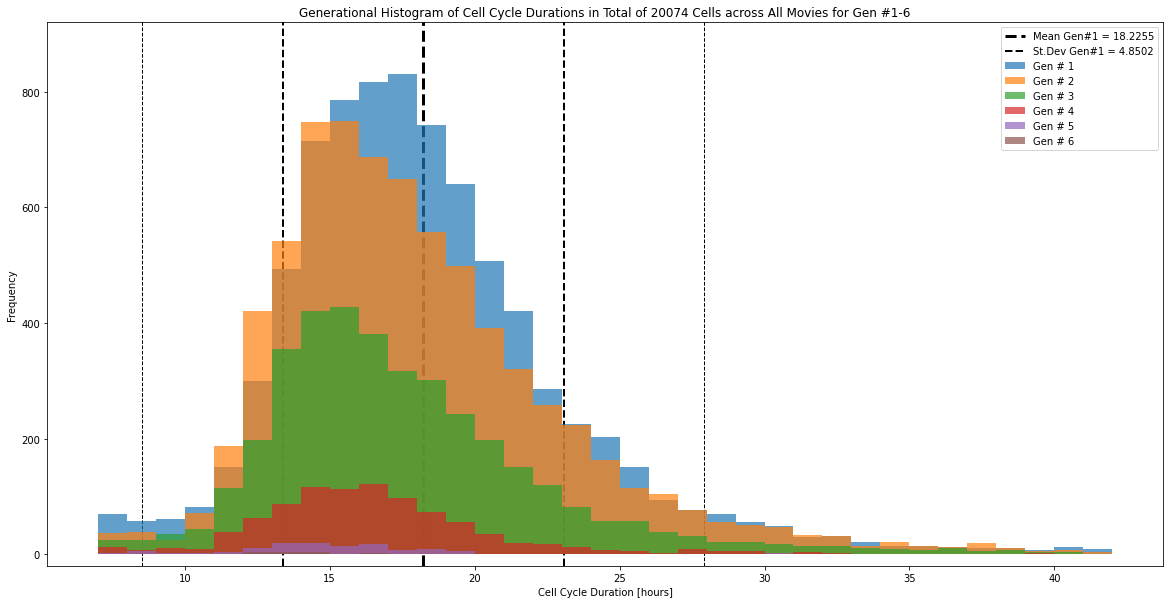

In [7]:
_ = plt.figure(figsize=(20, 10))

cells_in_hist = 0
for enum, generation in enumerate(cct[0:6]):
    bin_count, b, c = plt.hist(generation, bins=35, range=(7, 42), alpha=0.7, label="Gen # {}".format(enum + 1))
    cells_in_hist += int(sum(bin_count))
    
plt.title("Generational Histogram of Cell Cycle Durations in Total of {} Cells across All Movies for Gen #1-{}".format(cells_in_hist, len(cct[0:6])))
plt.axvline(x=mean[0], linestyle='dashed', linewidth=3, color="black", zorder=0, label="Mean Gen#1 = {}".format(round(mean[0], 4)))
plt.axvline(x=mean[0]-std[0], linestyle='dashed', linewidth=2, color="black", zorder=0, label="St.Dev Gen#1 = {}".format(round(std[0], 4)))
plt.axvline(x=mean[0]+std[0], linestyle='dashed', linewidth=2, color="black", zorder=0)
plt.axvline(x=mean[0]-2*std[0], linestyle='dashed', linewidth=1, color="black", zorder=0)
plt.axvline(x=mean[0]+2*std[0], linestyle='dashed', linewidth=1, color="black", zorder=0)

plt.xlabel("Cell Cycle Duration [hours]")
plt.ylabel("Frequency")
plt.ylim(-20, 920)
plt.legend(loc="best")
#plt.savefig("hist_generational.pdf", bbox_to_inches="tight")
plt.show()
plt.close()


### Plot the overall histograms including merged data from Gens #1-6:

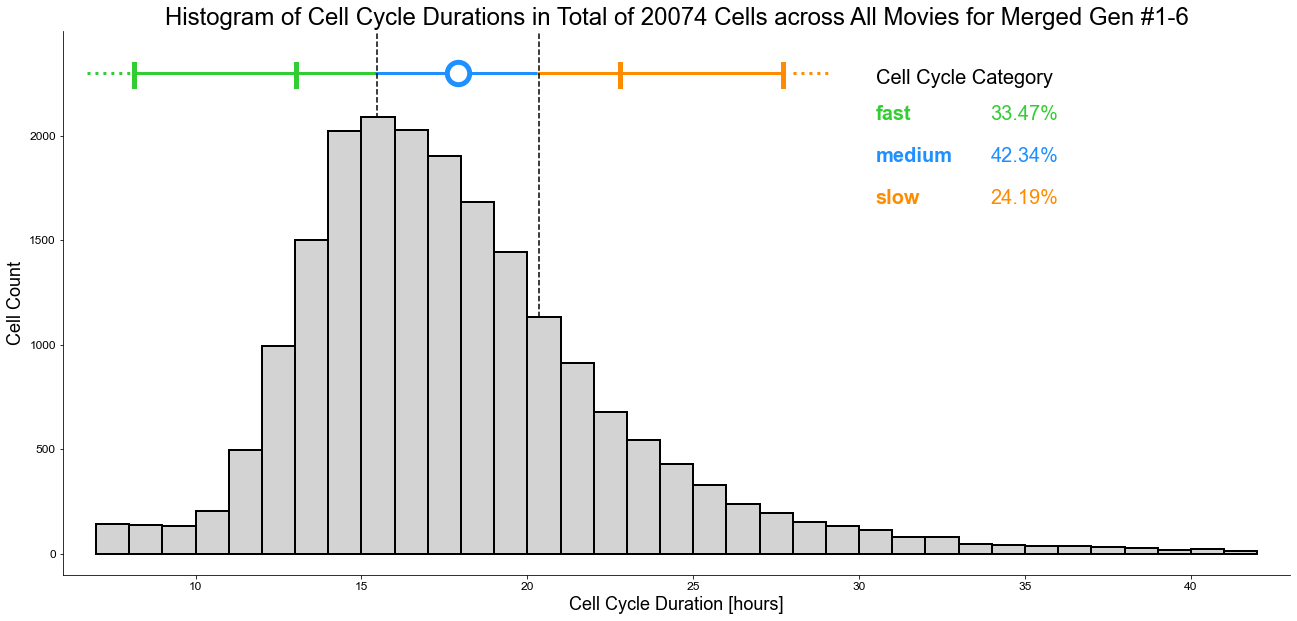

In [12]:
_ = plt.figure(figsize=(22, 10))

cells_in_hist = 0
cct_flat = [item for sublist in cct[0:6] for item in sublist]
mean_flat = np.mean([item for item in cct_flat if 7.0 <= item <= 42.0])
std_flat = np.std([item for item in cct_flat if 7.0 <= item <= 42.0])

bin_count, b, c = plt.hist(cct_flat, bins=35, range=(7, 42), color="lightgray", alpha=1.0, linewidth=2.0, linestyle='-', edgecolor="black")
cells_in_hist += int(sum(bin_count))
plt.title("Histogram of Cell Cycle Durations in Total of {} Cells across All Movies for Merged Gen #1-6".format(cells_in_hist), fontname="Arial", fontsize=24)
  
# Plot mean ± st.dev.:
plt.scatter(x=mean_flat, y=2300, marker='o', s=500, color="white", edgecolors="dodgerblue", linewidths=5.0, alpha=1.0, label=f"Mean = {round(mean_flat, 4)}")
plt.axvline(x=mean_flat-1*std_flat, ymin=0.90, ymax=0.94, linestyle='solid', linewidth=5.0, color="limegreen", zorder=0, label=f"St.Dev = {round(std_flat, 4)}")
plt.axvline(x=mean_flat-2*std_flat, ymin=0.90, ymax=0.94, linestyle='solid', linewidth=5.0, color="limegreen", zorder=0)
plt.axvline(x=mean_flat+1*std_flat, ymin=0.90, ymax=0.94, linestyle='solid', linewidth=5.0, color="darkorange", zorder=0)
plt.axvline(x=mean_flat+2*std_flat, ymin=0.90, ymax=0.94, linestyle='solid', linewidth=5.0, color="darkorange", zorder=0)

plt.axhline(y=2300, xmin=0.06, xmax=0.255, linestyle='solid', linewidth=3, color="limegreen", zorder=0)
plt.axhline(y=2300, xmin=0.255, xmax=0.387, linestyle='solid', linewidth=3, color="dodgerblue", zorder=0)
plt.axhline(y=2300, xmin=0.387, xmax=0.585, linestyle='solid', linewidth=3, color="darkorange", zorder=0)

plt.axhline(y=2300, xmin=0.02, xmax=0.06, linestyle='dotted', linewidth=3, color="limegreen", zorder=0)
plt.axhline(y=2300, xmin=0.595, xmax=0.625, linestyle='dotted', linewidth=3, color="darkorange", zorder=0)

# Plot the vertical lines separating fast, medium & slow cell cycling categories:
plt.axvline(x=mean_flat-(0.5*std_flat), ymin=0.4, linestyle='dashed', linewidth=1.5, color="black", zorder=0)
plt.axvline(x=mean_flat+(0.5*std_flat), ymin=0.4, linestyle='dashed', linewidth=1.5, color="black", zorder=0)

# Add an arbitrary 'legend':
plt.text(x=30.5, y=2275, s="Cell Cycle Category", color="black", fontname="Arial", fontsize=20, va="center")
plt.text(x=30.5, y=2100, s="fast", color="limegreen", fontname="Arial", fontsize=20, va="center", fontweight='bold')
plt.text(x=30.5, y=1900, s="medium", color="dodgerblue", fontname="Arial", fontsize=20, va="center", fontweight='bold')
plt.text(x=30.5, y=1700, s="slow", color="darkorange", fontname="Arial", fontsize=20, va="center", fontweight='bold')
plt.text(x=36, y=2100, s="33.47%", color="limegreen", fontname="Arial", fontsize=20, va="center", ha="right")
plt.text(x=36, y=1900, s="42.34%", color="dodgerblue", fontname="Arial", fontsize=20, va="center", ha="right")
plt.text(x=36, y=1700, s="24.19%", color="darkorange", fontname="Arial", fontsize=20, va="center", ha="right")

# Add label information:
plt.xlabel("Cell Cycle Duration [hours]", fontname="Arial", fontsize=18)
plt.ylabel("Cell Count", fontname="Arial", fontsize=18)
plt.xticks(fontname="Arial", fontsize=12)
plt.yticks(fontname="Arial", fontsize=12)

plt.xlim(6, 43)
plt.ylim(-100, 2499)
#plt.legend(loc="best")

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

plt.show()
plt.close()


##### Check normal distribution your data - is 67% of your cell cycle durations within 1std away from mean?

In [9]:
cells_in_hist = 0
cct_flat = [item for sublist in cct[0:6] for item in sublist]
mean_flat = np.mean([item for item in cct_flat if 7.0 <= item <= 42.0])
std_flat = np.std([item for item in cct_flat if 7.0 <= item <= 42.0])

# Normal distribution?
cct_collection = [item for sublist in cct[0:6] for item in sublist if 7.0 <= item <= 42.0]
mean_flat, std_flat = np.mean(cct_collection), np.std(cct_collection)

std_distance = [0 for _ in range(3)]
for i in cct_collection:
    for repeat in range(len(std_distance)):
        if mean_flat - (repeat + 1) * std_flat <= i <= mean_flat + (repeat + 1) * std_flat:
            std_distance[repeat] += 1

# Print the stats:
print (f"Ranged population of {len(cct_collection)} cells: mean ± st.dev = {mean_flat} ± {std_flat}")
print (f"Cells within 1x, 2x, 3x standard deviations {std_distance} -> {[round(item * 100 / len(cct_collection), 2) for item in std_distance]}%")
       

Ranged population of 20074 cells: mean ± st.dev = 17.918378793464182 ± 4.889333382967647
Cells within 1x, 2x, 3x standard deviations [15211, 19004, 19758] -> [75.77, 94.67, 98.43]%


### Check how many fast, medium & slow dividers:

In [10]:
cells_in_hist = 0
cct_flat = [item for sublist in cct[0:6] for item in sublist]
mean_flat = np.mean([item for item in cct_flat if 7.0 <= item <= 42.0])
std_flat = np.std([item for item in cct_flat if 7.0 <= item <= 42.0])

# Normal distribution?
cct_collection = [item for sublist in cct[0:6] for item in sublist if 7.0 <= item <= 42.0]
mean_flat, std_flat = np.mean(cct_collection), np.std(cct_collection)

categories = [0 for _ in range(3)]
for i in cct_collection:
    if i < mean_flat - (std_flat/2):
        categories[0] += 1
    if mean_flat - (std_flat/2) <= i <= mean_flat + (std_flat/2):
        categories[1] += 1
    if mean_flat + (std_flat/2) < i:
        categories[2] += 1

# Print the stats:
print (f"Ranged population of {len(cct_collection)} cells: mean ± st.dev = {mean_flat} ± {std_flat}")
print (f"Cells below, between & above mean ± 1/2  standard deviations {categories} -> {[round(item * 100 / len(cct_collection), 2) for item in categories]}%")
       

Ranged population of 20074 cells: mean ± st.dev = 17.918378793464182 ± 4.889333382967647
Cells below, between & above mean ± 1/2  standard deviations [6719, 8500, 4855] -> [33.47, 42.34, 24.19]%


### Plot the probability (density) histogram:

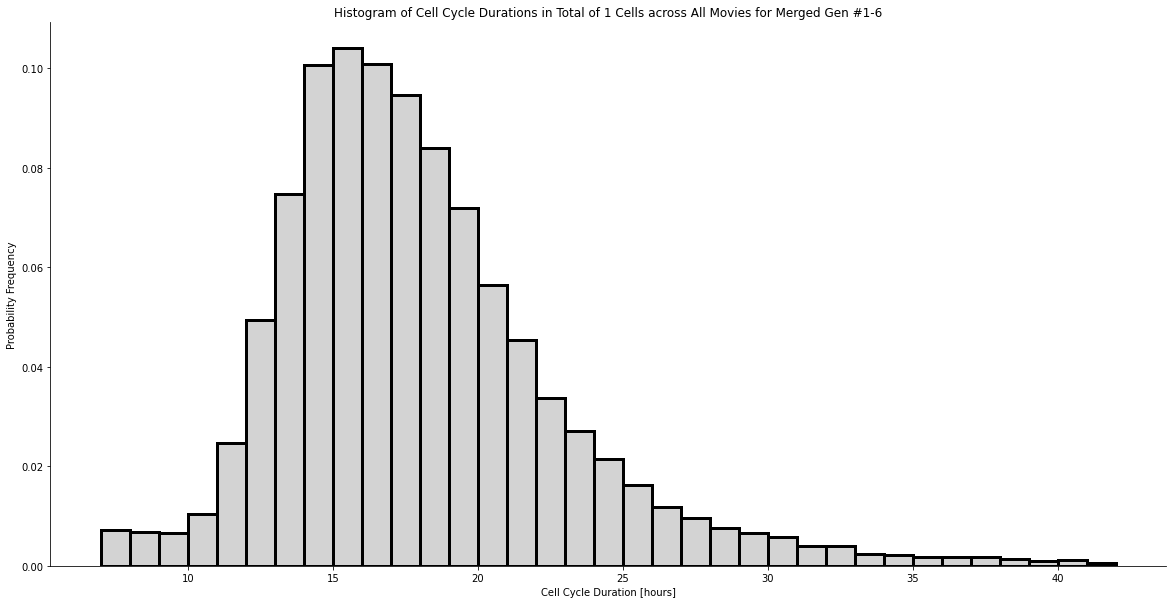

In [11]:
_ = plt.figure(figsize=(20, 10))

cct_flat = [item for sublist in cct[0:6] for item in sublist]
mean_flat = np.mean([item for item in cct_flat if 7.0 <= item <= 42.0])
std_flat = np.std([item for item in cct_flat if 7.0 <= item <= 42.0])

bin_count, b, c = plt.hist(cct_flat, bins=35, range=(7, 42), density=True, color="lightgray", alpha=1.0, linewidth=3.0, linestyle='-', edgecolor="black")
plt.title("Histogram of Cell Cycle Durations in Total of {} Cells across All Movies for Merged Gen #1-6".format(int(sum(bin_count))))

plt.xlabel("Cell Cycle Duration [hours]")
plt.ylabel("Probability Frequency")
plt.show()
plt.close()


### Done!